# Reusable workflows

Nipype doesn't just allow you to create your own workflows. It also already comes with predefined workflows, developed by the community, for the community. For a full list of all workflows, look under the [Workflows](http://nipype.readthedocs.io/en/latest/documentation.html) section of the main homepage.

But to give you a short overview, there are workflows about:

**Functional MRI** workflows:
 - from **``fsl``** about ``resting state``, ``fixed_effects``, ``modelfit``, ``featreg``, ``susan_smooth`` and many more
 - from **``spm``** about ``DARTEL`` and ``VBM``

**Structural MRI** workflows
 - from **``ants``** about ``ANTSBuildTemplate`` and ``antsRegistrationBuildTemplate``
 - from **``freesurfer``** about ``bem``, ``recon`` and tessellation
 
**Diffusion** workflows:
 - from **``camino``** about ``connectivity_mapping``,  ``diffusion`` and  ``group_connectivity``
 - from **``dipy``** about ``denoise``
 - from **``fsl``** about ``artifacts``, ``dti``, ``epi``, ``tbss`` and many more
 - from **``mrtrix``** about ``connectivity_mapping``, ``diffusion`` and ``group_connectivity``

# How to load a workflow from the Nipype library

Let's consider the example of a functional MRI workflow, that uses FSL's Susan algorithm to smooth some data. To load such a workflow, we only need the following command:

In [1]:
from niflow.nipype1.workflows.fmri.fsl.preprocess import create_susan_smooth
smoothwf = create_susan_smooth()

Once a workflow is created, we need to make sure that the mandatory inputs are specified. To see which inputs we have to define, we can use the command:

``create_susan_smooth?``

Which gives us the output:

```
Create a SUSAN smoothing workflow

Parameters
----------
Inputs:
    inputnode.in_files : functional runs (filename or list of filenames)
    inputnode.fwhm : fwhm for smoothing with SUSAN
    inputnode.mask_file : mask used for estimating SUSAN thresholds (but not for smoothing)

Outputs:
    outputnode.smoothed_files : functional runs (filename or list of filenames)
```

As we can see, we also need a mask file. For the sake of convenience, let's take the mean image of a functional image and threshold it at the 50% percentile:

In [2]:
!fslmaths /data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz \
    -Tmean -thrP 50 /output/sub-01_ses-test_task-fingerfootlips_mask.nii.gz

Now, we're ready to finish up our smooth workflow.

In [3]:
smoothwf.inputs.inputnode.in_files = '/data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz'
smoothwf.inputs.inputnode.mask_file = '/output/sub-01_ses-test_task-fingerfootlips_mask.nii.gz'
smoothwf.inputs.inputnode.fwhm = 4
smoothwf.base_dir = '/output'

Before we run it, let's visualize the graph:

211017-17:16:02,914 nipype.workflow INFO:
	 Generated workflow graph: /output/susan_smooth/graph.png (graph2use=colored, simple_form=True).


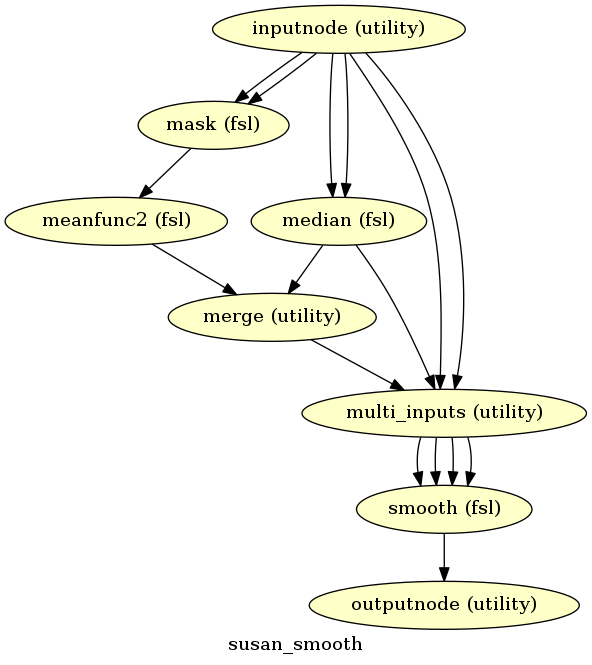

In [4]:
from nilearn import plotting
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
smoothwf.write_graph(graph2use='colored', format='png', simple_form=True)
Image(filename='/output/susan_smooth/graph.png')

And we're ready to go:

In [5]:
smoothwf.run('MultiProc', plugin_args={'n_procs': 4})

211017-17:16:02,971 nipype.workflow INFO:
	 Workflow susan_smooth settings: ['check', 'execution', 'logging', 'monitoring']
211017-17:16:02,982 nipype.workflow INFO:
	 Running in parallel.
211017-17:16:02,991 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 1.75/1.75, Free processors: 4/4.
211017-17:16:03,146 nipype.workflow INFO:
	 [Node] Setting-up "susan_smooth.median" in "/output/susan_smooth/median".
211017-17:16:03,141 nipype.workflow INFO:
	 [Node] Setting-up "susan_smooth.mask" in "/output/susan_smooth/mask".
211017-17:16:03,168 nipype.workflow INFO:
	 [Node] Setting-up "_median0" in "/output/susan_smooth/median/mapflow/_median0".
211017-17:16:03,171 nipype.workflow INFO:
	 [Node] Setting-up "_mask0" in "/output/susan_smooth/mask/mapflow/_mask0".
211017-17:16:03,180 nipype.workflow INFO:
	 [Node] Running "_median0" ("nipype.interfaces.fsl.utils.ImageStats"), a CommandLine Interface with command:
fslstats /data/ds000114/sub-01/ses-test/fun

Once it's finished, we can look at the results:

In [6]:
%%bash
fslmaths /data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz -Tmean fmean.nii.gz
fslmaths /output/susan_smooth/smooth/mapflow/_smooth0/sub-01_ses-test_task-fingerfootlips_bold_smooth.nii.gz \
    -Tmean smean.nii.gz

In [7]:
from nilearn import image, plotting

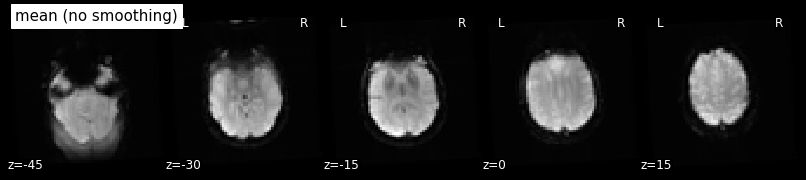

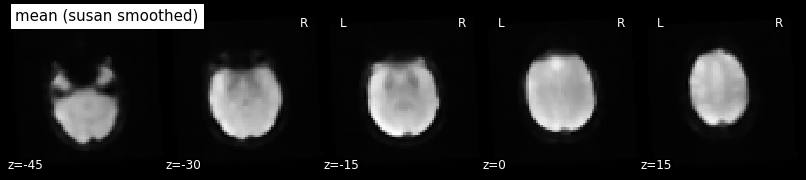

In [8]:
plotting.plot_epi(
    'fmean.nii.gz', title="mean (no smoothing)", display_mode='z',
    cmap='gray', cut_coords=(-45, -30, -15, 0, 15));
plotting.plot_epi(
    'smean.nii.gz', title="mean (susan smoothed)", display_mode='z',
    cmap='gray', cut_coords=(-45, -30, -15, 0, 15));

# Inspect inputs and outputs of a loaded or created workflow

If you want to see a summary of all possible inputs and outputs of a given workflow, use the `_get_inputs()` and the `_get_outputs()` function.

In [9]:
# Show all possible inputs
smoothwf._get_inputs()


inputnode = 
fwhm = 4
in_files = /data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz
mask_file = /output/sub-01_ses-test_task-fingerfootlips_mask.nii.gz

mask = 
args = <undefined>
environ = {'FSLOUTPUTTYPE': 'NIFTI_GZ'}
mask_file = <undefined>
op_string = -mas
out_data_type = <undefined>
out_file = <undefined>
output_type = NIFTI_GZ
suffix = _mask

meanfunc2 = 
args = <undefined>
environ = {'FSLOUTPUTTYPE': 'NIFTI_GZ'}
in_file2 = <undefined>
mask_file = <undefined>
op_string = -Tmean
out_data_type = <undefined>
out_file = <undefined>
output_type = NIFTI_GZ
suffix = _mean

median = 
args = <undefined>
environ = {'FSLOUTPUTTYPE': 'NIFTI_GZ'}
index_mask_file = <undefined>
op_string = -k %s -p 50
output_type = NIFTI_GZ
split_4d = <undefined>

merge = 
axis = hstack
no_flatten = False
ravel_inputs = False

multi_inputs = 
function_str = def cartesian_product(fwhms, in_files, usans, btthresh):
    from nipype.utils.filemanip import ensure_list
    # ensure a

In [10]:
# Show all possible outputs
smoothwf._get_outputs()


inputnode = 
fwhm = None
in_files = None
mask_file = None

mask = 
out_file = None

meanfunc2 = 
out_file = None

median = 
out_stat = None

merge = 
out = None

multi_inputs = 
cart_btthresh = None
cart_fwhm = None
cart_in_file = None
cart_usans = None

outputnode = 
smoothed_files = None

smooth = 
smoothed_file = None


# How to change node parameters from existing workflows

What if we want to change certain parameters of a loaded or already existing workflow? Let's first get the names of all the nodes in the workflow:

In [11]:
print(smoothwf.list_node_names())

['inputnode', 'mask', 'meanfunc2', 'median', 'merge', 'multi_inputs', 'outputnode', 'smooth']


Ok. Hmm, what if we want to change the 'median' node, from 50% to 99%? For this, we first need to get the node.

In [12]:
median = smoothwf.get_node('median')

Now that we have the node, we can change its value as we want:

In [13]:
median.inputs.op_string = '-k %s -p 99'

And we can run the workflow again...

In [14]:
smoothwf.run('MultiProc', plugin_args={'n_procs': 4})

211017-17:16:49,356 nipype.workflow INFO:
	 Workflow susan_smooth settings: ['check', 'execution', 'logging', 'monitoring']
211017-17:16:49,364 nipype.workflow INFO:
	 Running in parallel.
211017-17:16:49,367 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 1.75/1.75, Free processors: 4/4.
211017-17:16:49,448 nipype.workflow INFO:
	 [Job 0] Cached (susan_smooth.mask).
211017-17:16:49,455 nipype.workflow INFO:
	 [Node] Outdated cache found for "susan_smooth.median".
211017-17:16:49,502 nipype.workflow INFO:
	 [Node] Setting-up "susan_smooth.median" in "/output/susan_smooth/median".
211017-17:16:49,514 nipype.workflow INFO:
	 [Node] Outdated cache found for "susan_smooth.median".
211017-17:16:49,522 nipype.workflow INFO:
	 [Node] Setting-up "_median0" in "/output/susan_smooth/median/mapflow/_median0".
211017-17:16:49,526 nipype.workflow INFO:
	 [Node] Outdated cache found for "_median0".
211017-17:16:49,535 nipype.workflow INFO:
	 [Node] Running "_

And now the output is:

In [15]:
!fslmaths /output/susan_smooth/smooth/mapflow/_smooth0/sub-01_ses-test_task-fingerfootlips_bold_smooth.nii.gz \
    -Tmean mmean.nii.gz

In [16]:
from nilearn import image, plotting

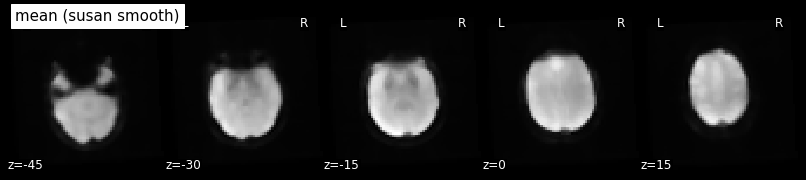

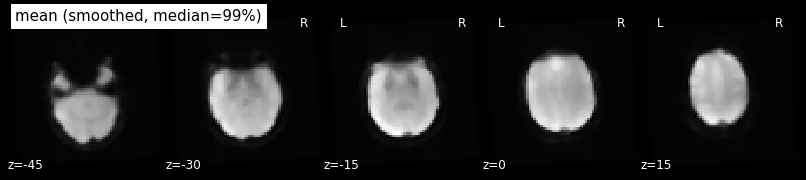

In [17]:
plotting.plot_epi(
    'smean.nii.gz', title="mean (susan smooth)", display_mode='z',
    cmap='gray', cut_coords=(-45, -30, -15, 0, 15))
plotting.plot_epi(
    'mmean.nii.gz', title="mean (smoothed, median=99%)", display_mode='z',
    cmap='gray', cut_coords=(-45, -30, -15, 0, 15))